In [74]:
!pip install gseapy

In [75]:
import gseapy as gp
import pandas as pd

In [76]:
## Import the output table of CRISPR screens as dataframe

df = pd.read_table('PRMT5_DMSO_differential.txt')

print(df)

         Gene   Category  PRMT5_biased  DMSO_biased     PRMT5      DMSO  \
0       PPP4C      Other     -1.391712    -0.920506 -1.420999 -0.892814   
1       PRMT5      Other     -0.745324    -0.266945 -0.770068 -0.265418   
2     HDGFRP2      Other     -0.413583    -0.009660 -0.417287 -0.009358   
3      SMNDC1      Other     -1.115249    -0.787404 -1.160153 -0.766771   
4       PRMT1      Other     -0.348763     0.026136 -0.351032  0.028911   
...       ...        ...           ...          ...       ...       ...   
1113    UBE3D      Other      0.496689     0.161840  0.505475  0.161485   
1114   METTL3      Other     -0.184093    -0.559196 -0.194697 -0.546443   
1115      ATR      Other     -1.022823    -1.457374 -1.049647 -1.419438   
1116  METTL14      Other      0.135077    -0.312501  0.135817 -0.310146   
1117     CCT7  Essential     -0.926772    -1.453481 -0.953727 -1.419265   

             Z          P(-)    FDR(-)      P(+)    FDR(+)  P(replicates)  \
0    -5.175958  1.1337

In [78]:
## To rank the genes based on differetial essential Z-score

df['Rank'] = df.Z

df.sort_values(by='Rank',inplace=True)

In [79]:
df

,Gene,Category,PRMT5_biased,DMSO_biased,PRMT5,DMSO,Z,P(-),FDR(-),P(+),FDR(+),P(replicates),FDR(replicates),P(sgRNAs),FDR(sgRNAs),Rank
0,PPP4C,Other,-1.391712,-0.920506,-1.420999,-0.892814,-5.175958,1.133724e-07,0.000127,1.000000,1.000000,0.002847,0.793765,0.000004,0.001238,-5.175958
1,PRMT5,Other,-0.745324,-0.266945,-0.770068,-0.265418,-4.945346,3.800432e-07,0.000212,1.000000,1.000000,0.007508,0.793765,0.000004,0.001238,-4.945346
2,HDGFRP2,Other,-0.413583,-0.009660,-0.417287,-0.009358,-3.997596,3.199448e-05,0.011923,0.999968,1.000000,0.009832,0.793765,0.000155,0.019252,-3.997596
3,SMNDC1,Other,-1.115249,-0.787404,-1.160153,-0.766771,-3.855049,5.785314e-05,0.016170,0.999942,1.000000,0.040122,0.793765,0.000004,0.001238,-3.855049
4,PRMT1,Other,-0.348763,0.026136,-0.351032,0.028911,-3.723365,9.829234e-05,0.021978,0.999902,1.000000,0.048504,0.793765,0.000677,0.058264,-3.723365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,UBE3D,Other,0.496689,0.161840,0.505475,0.161485,3.370299,9.996246e-01,0.999997,0.000375,0.072727,0.000330,0.368602,0.005663,0.237074,3.370299
1114,METTL3,Other,-0.184093,-0.559196,-0.194697,-0.546443,3.446301,9.997158e-01,0.999997,0.000284,0.072727,0.109208,0.851280,0.000536,0.050743,3.446301
1115,ATR,Other,-1.022823,-1.457374,-1.049647,-1.419438,3.623120,9.998545e-01,0.999997,0.000146,0.054236,0.032575,0.793765,0.000314,0.035149,3.623120
1116,METTL14,Other,0.135077,-0.312501,0.135817,-0.310146,4.369509,9.999938e-01,0.999997,0.000006,0.003481,0.020534,0.793765,0.000084,0.015677,4.369509


In [67]:
## Get the table as GSEA inputs

df_rank = df.loc[:,['Gene','Rank']]

In [80]:
df_rank

,Gene,Rank
0,PPP4C,-5.175958
1,PRMT5,-4.945346
2,HDGFRP2,-3.997596
3,SMNDC1,-3.855049
4,PRMT1,-3.723365
...,...,...
1113,UBE3D,3.370299
1114,METTL3,3.446301
1115,ATR,3.623120
1116,METTL14,4.369509


In [81]:
## Load all the possible gene sets in the library

gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisGeNET',
 'Disease_

In [82]:
## Get the GESA results for GO_BP gene sets

gsea_res = gp.prerank(rnk = df_rank, gene_sets='GO_Biological_Process_2021', seed = 1024)

In [70]:
## The results of GSEA stores as a dictionary

print(list(gsea_res.results.keys())[0])

print(list(gsea_res.results.values())[0])

protein deubiquitination (GO:0016579)
{'name': 'prerank', 'es': -0.3502947880498049, 'nes': -1.5076605717452944, 'pval': 0.006289308176100629, 'fdr': 0.5876793371964478, 'fwerp': 0.965, 'tag %': '31/105', 'gene %': '17.89%', 'lead_genes': 'USP37;INO80B;INO80;ACTR8;ASXL2;USP25;USP33;KAT2B;PSMD7;SUPT3H;USP9X;OGT;USP22;ACTL6A;SIAH2;BIRC3;USP49;BARD1;INO80D;APC;PSMA2;CDC20;USP14;CYLD;PSMB2;USP11;PSMD6;USP4;KEAP1;YY1;USP2', 'matched_genes': 'USP36;USP8;USP3;USP10;MYC;ATXN7L3;EP300;USP42;TADA3;SMAD4;TRRAP;SUDS3;CDK1;MYSM1;BRCA1;ASXL1;PSMA1;TNFAIP3;KDM1B;USP16;USP26;SMAD2;MDM2;GATA3;USP15;RHOA;USP17L2;PSMA3;ACTR5;VCP;PSMC4;UIMC1;USP46;BAP1;MDM4;TP53;USP29;MAP3K7;UCHL5;PSMD11;KAT2A;USP7;USP12;ESR1;USP27X;USP1;SKP2;BRCC3;USP13;ENY2;HCFC1;TAF10;TADA2B;ATXN7;MBD5;PSMB3;USP38;USP21;RPS27A;MBD6;TRAF6;SMURF2;RUVBL1;USP18;UBE2D1;INO80E;USP44;TAF9B;USP45;PSMD1;INO80C;PTEN;USP51;SMAD3;USP2;YY1;KEAP1;USP4;PSMD6;USP11;PSMB2;CYLD;USP14;CDC20;PSMA2;APC;INO80D;BARD1;USP49;BIRC3;SIAH2;ACTL6A;USP22;OGT;USP9X;

In [83]:
out_list = []

for term in gsea_res.results:
    p = gsea_res.results[term]['pval']
    fdr = gsea_res.results[term]['fdr']
    nes = gsea_res.results[term]['nes']
    es = gsea_res.results[term]['es']
    gene = gsea_res.results[term]['lead_genes']
    out_list.append([term, p, fdr, nes, es, gene])

df_out = pd.DataFrame(out_list, columns = ['Term','p_value','fdr', 'nes', 'es','gene']).sort_values('fdr').reset_index(drop = True)
df_out

,Term,p_value,fdr,nes,es,gene
0,central nervous system development (GO:0007417),0.000000,0.129388,1.895595,0.595601,CDK5;ELP3;CIC;SETD1A;PTPN11;ZBTB16;BPTF;SMO;CH...
1,positive regulation of translation (GO:0045727),0.002020,0.156383,1.830638,0.606719,METTL14;METTL3;JMJD4;EEF2;FXR1;NAT10
2,positive regulation of cellular amide metaboli...,0.005894,0.274601,1.740488,0.606781,METTL14;METTL3;EEF2;FXR1;NAT10
3,protein stabilization (GO:0050821),0.001898,0.520578,1.635297,0.450355,CCT7;CCT4;USP36;CCT3;RPS7;SOX17;EP300;VHL;TAF9...
4,histone monoubiquitination (GO:0010390),0.076628,0.524497,-1.468359,-0.502253,RNF20;KDM2B;RNF40;RNF168;UHRF1;SKP1;LEO1
...,...,...,...,...,...,...
324,protein K48-linked ubiquitination (GO:0070936),0.831349,1.000000,0.733771,0.225564,UBE2K;NEDD4L;UBE2E1;TOPORS
325,small GTPase mediated signal transduction (GO:...,0.885655,1.000000,0.675893,0.238625,USP8
326,negative regulation of cell growth (GO:0030308),0.941860,1.000000,0.633500,0.202203,SOX17;SMARCA2;SMAD4;CDKN2C;JADE1
327,mitotic DNA damage checkpoint signaling (GO:00...,0.831721,1.000000,0.742040,0.260210,HUS1;CDK1;BRCA1;CHEK1;CDK2;ATM;NEK11;RPA2


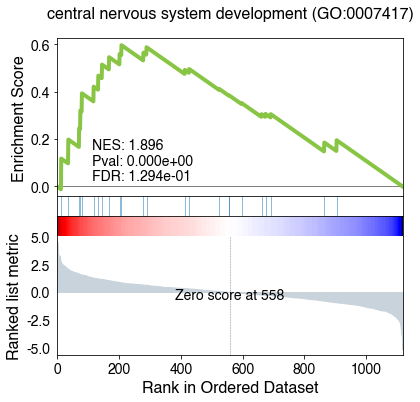

In [72]:
## Plot the GSEA figure for specific term

from gseapy.plot import gseaplot
import matplotlib.pyplot as plt


plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Helvetica"

term_to_plot = df_out['Term'][0]

gseaplot(gsea_res.ranking, term = term_to_plot, **gsea_res.results[term_to_plot])

plt.savefig('my_gsea_plot.png',dpi=300,facecolor='white',bbox_inches='tight')


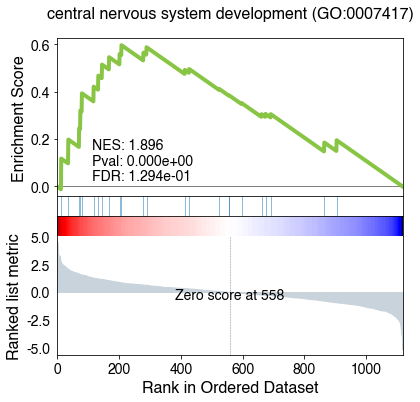

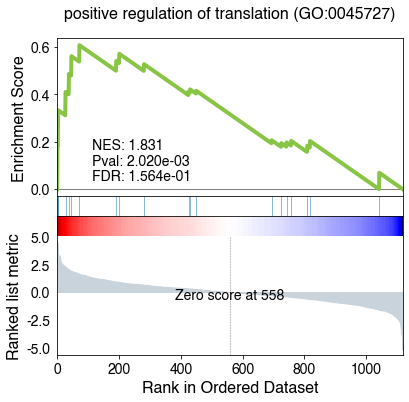

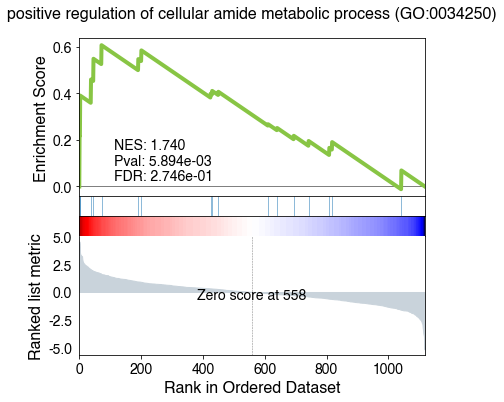

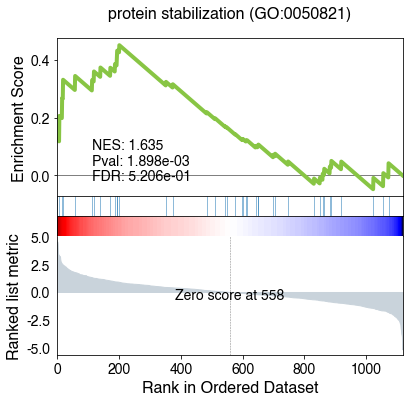

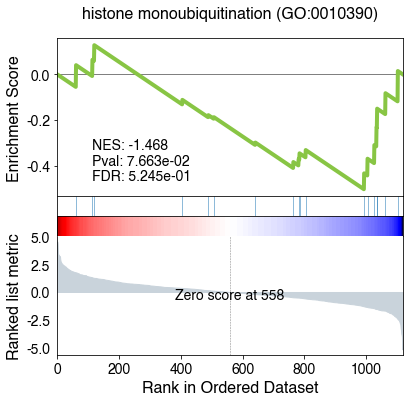

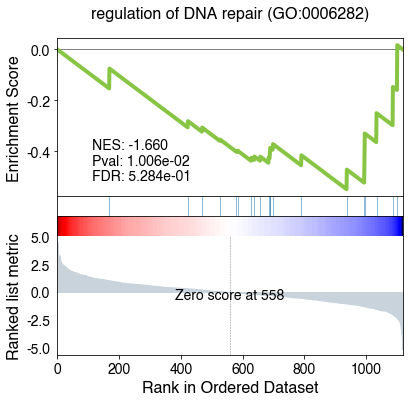

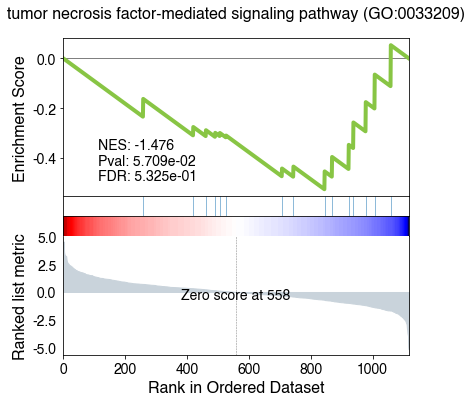

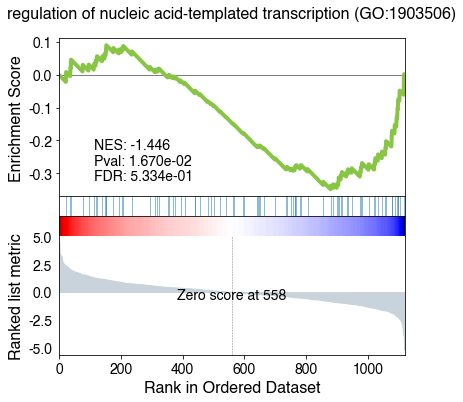

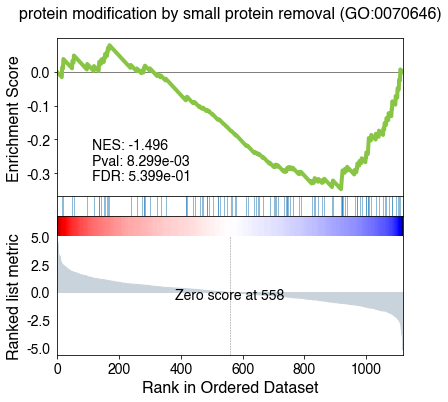

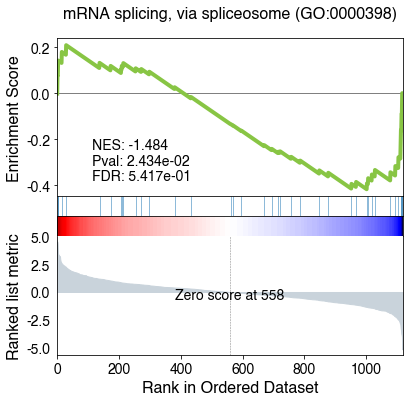

In [73]:
## Plot the GSEA figures for the top10 terms

for term in df_out['Term'][0:10]:
    gseaplot(pre_res.ranking, term = term, **gsea_res.results[term])
       